# Data preparation and analysis #

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt          
import datetime as dt                    
import seaborn as sns
import matplotlib.dates as mdates
 
import pandas_datareader.data as web    

myfigsize=(15,8)
import os

In [2]:
codes = ['CPILFESL','RNUSBIS','POILBREUSDM','PFOODINDEXM','PMETAINDEXM','REAINTRATREARAT1YE','REAINTRATREARAT10Y',
         'FEDFUNDS']  

fred= web.DataReader(codes, 'fred', start='1995-01-01',end='2022-12-31')
#fred['credit_spread'] = fred['DBAA'] - fred['DAAA']
fred.head()

,CPILFESL,RNUSBIS,POILBREUSDM,PFOODINDEXM,PMETAINDEXM,REAINTRATREARAT1YE,REAINTRATREARAT10Y,FEDFUNDS
DATE,,,,,,,,
1995-01-01,159.0,80.69,16.654091,60.153145,62.257141,2.329828,4.244290,5.53
1995-02-01,159.4,79.90,17.271000,60.736427,58.108061,2.257304,4.054997,5.92
1995-03-01,159.9,78.49,17.236522,60.729126,56.360972,2.161279,3.720986,5.98
1995-04-01,160.4,74.97,18.824000,59.912492,56.665862,2.362220,3.654927,6.05
1995-05-01,160.7,74.69,18.677826,59.624042,54.931480,3.710934,3.420481,6.01


In [3]:
fred = fred.rename(columns={'CPILFESL':'CPI','POILBREUSDM':'NPO', 'RNUSBIS':'REER','PFOODINDEXM':'NPF','PMETAINDEXM':'NPM',
                           'REAINTRATREARAT1YE':'1-Year Interest','REAINTRATREARAT10Y':'10-Year Interest'}) 
fred

,CPI,REER,NPO,NPF,NPM,1-Year Interest,10-Year Interest,FEDFUNDS
DATE,,,,,,,,
1995-01-01,159.000,80.69,16.654091,60.153145,62.257141,2.329828,4.244290,5.53
1995-02-01,159.400,79.90,17.271000,60.736427,58.108061,2.257304,4.054997,5.92
1995-03-01,159.900,78.49,17.236522,60.729126,56.360972,2.161279,3.720986,5.98
1995-04-01,160.400,74.97,18.824000,59.912492,56.665862,2.362220,3.654927,6.05
1995-05-01,160.700,74.69,18.677826,59.624042,54.931480,3.710934,3.420481,6.01
...,...,...,...,...,...,...,...,...
2022-08-01,296.569,108.63,97.643043,140.242179,174.737241,-1.470680,0.855625,2.33
2022-09-01,298.284,111.13,90.608182,135.468754,165.864220,-2.589102,1.204249,2.56
2022-10-01,299.351,112.19,93.718571,138.284393,161.612637,0.027137,1.797332,3.08


In [4]:
#fred.index = pd.to_datetime(fred.index)
#fred = fred.resample('QS').mean()
#fred.index = pd.to_datetime(fred.index)
#fred.index

In [5]:
fred['RPO'] = (fred['NPO'] / fred['CPI']) * 100
fred['RPF'] = (fred['NPF'] / fred['CPI']) * 100
fred['RPM'] = (fred['NPM'] / fred['CPI']) * 100
#final_data['Ind_inputR'] = (final_data['Ind_input'] / final_data['CPI']) * 100
fred.head()

,CPI,REER,NPO,NPF,NPM,1-Year Interest,10-Year Interest,FEDFUNDS,RPO,RPF,RPM
DATE,,,,,,,,,,,
1995-01-01,159.0,80.69,16.654091,60.153145,62.257141,2.329828,4.244290,5.53,10.474271,37.832167,39.155435
1995-02-01,159.4,79.90,17.271000,60.736427,58.108061,2.257304,4.054997,5.92,10.835006,38.103153,36.454241
1995-03-01,159.9,78.49,17.236522,60.729126,56.360972,2.161279,3.720986,5.98,10.779563,37.979441,35.247638
1995-04-01,160.4,74.97,18.824000,59.912492,56.665862,2.362220,3.654927,6.05,11.735661,37.351928,35.327844
1995-05-01,160.7,74.69,18.677826,59.624042,54.931480,3.710934,3.420481,6.01,11.622792,37.102702,34.182626


In [6]:
fred.index= pd.to_datetime(fred.index)
fred.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', name='DATE', length=336, freq=None)

# Proxy for Output #

In [7]:
#https://stats.oecd.org/Index.aspx?querytype=view&queryname=90#
Industrial_production=pd.read_excel('Industrial production.xlsx',usecols=['TIME','Value'])
Industrial_production=Industrial_production[Industrial_production["TIME"]>= '1995-01']
Industrial_production

,TIME,Value
36,1995-01,71.638267
37,1995-02,71.517389
38,1995-03,71.622271
39,1995-04,72.011242
40,1995-05,71.986188
...,...,...
367,2022-08,107.058502
368,2022-09,107.003853
369,2022-10,106.191369
370,2022-11,106.048565


In [8]:
print(fred.isnull().sum())

CPI                 0
REER                0
NPO                 0
NPF                 0
NPM                 0
1-Year Interest     0
10-Year Interest    0
FEDFUNDS            0
RPO                 0
RPF                 0
RPM                 0
dtype: int64


In [9]:
Industrial_production = Industrial_production.rename(columns={'TIME':'DATE','Value':'yo'})
Industrial_production.head()

,DATE,yo
36,1995-01,71.638267
37,1995-02,71.517389
38,1995-03,71.622271
39,1995-04,72.011242
40,1995-05,71.986188
...,...,...
367,2022-08,107.058502
368,2022-09,107.003853
369,2022-10,106.191369
370,2022-11,106.048565


In [10]:
Industrial_production['DATE'] = pd.to_datetime(Industrial_production['DATE']) 
Industrial_production.set_index('DATE',inplace=True)
Industrial_production.head()

,yo
DATE,
1995-01-01,71.638267
1995-02-01,71.517389
1995-03-01,71.622271
1995-04-01,72.011242
1995-05-01,71.986188
...,...
2022-08-01,107.058502
2022-09-01,107.003853
2022-10-01,106.191369


In [11]:
#Industrial_production = Industrial_production.resample('QS').mean()
#Industrial_production

In [12]:
data_cmo = pd.merge(right=fred, left=Industrial_production, left_index=True, right_index=True, how='outer', indicator=False)
data_cmo.head()

,yo,CPI,REER,NPO,NPF,NPM,1-Year Interest,10-Year Interest,FEDFUNDS,RPO,RPF,RPM
DATE,,,,,,,,,,,,
1995-01-01,71.638267,159.000,80.69,16.654091,60.153145,62.257141,2.329828,4.244290,5.53,10.474271,37.832167,39.155435
1995-02-01,71.517389,159.400,79.90,17.271000,60.736427,58.108061,2.257304,4.054997,5.92,10.835006,38.103153,36.454241
1995-03-01,71.622271,159.900,78.49,17.236522,60.729126,56.360972,2.161279,3.720986,5.98,10.779563,37.979441,35.247638
1995-04-01,72.011242,160.400,74.97,18.824000,59.912492,56.665862,2.362220,3.654927,6.05,11.735661,37.351928,35.327844
1995-05-01,71.986188,160.700,74.69,18.677826,59.624042,54.931480,3.710934,3.420481,6.01,11.622792,37.102702,34.182626
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,107.058502,296.569,108.63,97.643043,140.242179,174.737241,-1.470680,0.855625,2.33,32.924225,47.288213,58.919591
2022-09-01,107.003853,298.284,111.13,90.608182,135.468754,165.864220,-2.589102,1.204249,2.56,30.376481,45.416031,55.606140
2022-10-01,106.191369,299.351,112.19,93.718571,138.284393,161.612637,0.027137,1.797332,3.08,31.307252,46.194732,53.987672


In [13]:
#ind_input.to_csv('indput.csv', index=False)
#ind_inputs = pd.read_csv('indput.csv', header=1)

#ind_inputs

In [14]:
# https://data.imf.org/?sk=471dddf8-d8a7-499a-81ba-5b332c01f8b9&sid=1390030341854
industrial_input=pd.read_excel('industrial inputs.xlsx',na_values='NaN',header=1)

ind_input=industrial_input
ind_input
industrial_input.set_index('Unnamed: 0',inplace=True)

In [15]:
def filter_columns(column_name):
    return not column_name.startswith('U')

ind_input = ind_input.filter(items=[col for col in ind_input.columns if filter_columns(col)])

ind_input.head()

,Jan 1992,Feb 1992,Mar 1992,Apr 1992,May 1992,Jun 1992,Jul 1992,Aug 1992,Sep 1992,Oct 1992,...,Mar 2022,Apr 2022,May 2022,Jun 2022,Jul 2022,Aug 2022,Sep 2022,Oct 2022,Nov 2022,Dec 2022
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Metals,46.948673,48.319412,48.220121,48.628629,48.605568,48.725491,50.821035,50.472097,49.130352,45.975917,...,233.428478,231.435846,208.086171,200.262240,172.466826,174.737241,165.864220,161.612637,169.005520,184.304374
Precious Metal,28.019392,28.053274,27.341581,26.893615,26.830129,27.134116,27.973306,27.167358,27.332398,27.317712,...,160.430146,157.894007,149.927321,148.240501,140.334613,143.263675,137.062373,136.059120,140.510205,145.809430
avg,37.484033,38.186343,37.780851,37.761122,37.717849,37.929803,39.397171,38.819727,38.231375,36.646815,...,196.929312,194.664926,179.006746,174.251370,156.400720,159.000458,151.463296,148.835879,154.757863,165.056902
sum,74.968065,76.372686,75.561703,75.522244,75.435697,75.859607,78.794341,77.639454,76.462751,73.293629,...,393.858623,389.329853,358.013492,348.502741,312.801440,318.000916,302.926593,297.671758,309.515725,330.113804


In [16]:
ind_input.reset_index(inplace=True)
ind_input=ind_input.T
ind_input=ind_input.rename(columns={'Unnamed: 0':'DATE'})
ind_input.head()

,0,1,2,3
Unnamed: 0,Metals,Precious Metal,avg,sum
Jan 1992,46.948673,28.019392,37.484033,74.968065
Feb 1992,48.319412,28.053274,38.186343,76.372686
Mar 1992,48.220121,27.341581,37.780851,75.561703
Apr 1992,48.628629,26.893615,37.761122,75.522244
...,...,...,...,...
Aug 2022,174.737241,143.263675,159.000458,318.000916
Sep 2022,165.86422,137.062373,151.463296,302.926593
Oct 2022,161.612637,136.05912,148.835879,297.671758
Nov 2022,169.00552,140.510205,154.757863,309.515725


In [17]:
ind_input.to_csv('indput.csv')
ind_inputs = pd.read_csv('indput.csv', header=1)

ind_inputs.head()

,Unnamed: 0,Metals,Precious Metal,avg,sum
0,Jan 1992,46.948673,28.019392,37.484033,74.968065
1,Feb 1992,48.319412,28.053274,38.186343,76.372686
2,Mar 1992,48.220121,27.341581,37.780851,75.561703
3,Apr 1992,48.628629,26.893615,37.761122,75.522244
4,May 1992,48.605568,26.830129,37.717849,75.435697
...,...,...,...,...,...
367,Aug 2022,174.737241,143.263675,159.000458,318.000916
368,Sep 2022,165.864220,137.062373,151.463296,302.926593
369,Oct 2022,161.612637,136.059120,148.835879,297.671758
370,Nov 2022,169.005520,140.510205,154.757863,309.515725


In [18]:
ind_inputs=ind_inputs.rename(columns={'Unnamed: 0':'DATE','avg':'Ind_inputs'})

ind_inputs.head()

,DATE,Metals,Precious Metal,Ind_inputs,sum
0,Jan 1992,46.948673,28.019392,37.484033,74.968065
1,Feb 1992,48.319412,28.053274,38.186343,76.372686
2,Mar 1992,48.220121,27.341581,37.780851,75.561703
3,Apr 1992,48.628629,26.893615,37.761122,75.522244
4,May 1992,48.605568,26.830129,37.717849,75.435697
...,...,...,...,...,...
367,Aug 2022,174.737241,143.263675,159.000458,318.000916
368,Sep 2022,165.864220,137.062373,151.463296,302.926593
369,Oct 2022,161.612637,136.059120,148.835879,297.671758
370,Nov 2022,169.005520,140.510205,154.757863,309.515725


In [19]:
ind_inputs['DATE'] = pd.to_datetime(ind_inputs['DATE'])
ind_inputs.set_index('DATE',inplace=True)
print(ind_inputs.head(),ind_inputs.tail())

C:\Users\oktri\AppData\Local\Temp\ipykernel_29160\787954263.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind_inputs['DATE'] = pd.to_datetime(ind_inputs['DATE'])


,Metals,Precious Metal,Ind_inputs,sum
DATE,,,,
1992-01-01,46.948673,28.019392,37.484033,74.968065
1992-02-01,48.319412,28.053274,38.186343,76.372686
1992-03-01,48.220121,27.341581,37.780851,75.561703
1992-04-01,48.628629,26.893615,37.761122,75.522244
1992-05-01,48.605568,26.830129,37.717849,75.435697
...,...,...,...,...
2022-08-01,174.737241,143.263675,159.000458,318.000916
2022-09-01,165.864220,137.062373,151.463296,302.926593
2022-10-01,161.612637,136.059120,148.835879,297.671758


In [20]:
ind_inputs=ind_inputs.loc['1995-02-01':'2022-12-01']
ind_inputs

,Metals,Precious Metal,Ind_inputs,sum
DATE,,,,
1995-02-01,58.108061,30.343371,44.225716,88.451432
1995-03-01,56.360972,30.718286,43.539629,87.079258
1995-04-01,56.665862,31.813222,44.239542,88.479085
1995-05-01,54.931480,31.337340,43.134410,86.268820
1995-06-01,57.080115,31.433258,44.256686,88.513373
...,...,...,...,...
2022-08-01,174.737241,143.263675,159.000458,318.000916
2022-09-01,165.864220,137.062373,151.463296,302.926593
2022-10-01,161.612637,136.059120,148.835879,297.671758


In [21]:
#ind_inputs = ind_inputs.resample('QS').mean()
#ind_inputs.head(5)

In [22]:
final_data = pd.merge(right=ind_inputs, left=data_cmo, left_index=True, right_index=True, how='outer', indicator=False)
final_data.head()

,yo,CPI,REER,NPO,NPF,NPM,1-Year Interest,10-Year Interest,FEDFUNDS,RPO,RPF,RPM,Metals,Precious Metal,Ind_inputs,sum
DATE,,,,,,,,,,,,,,,,
1995-01-01,71.638267,159.0,80.69,16.654091,60.153145,62.257141,2.329828,4.244290,5.53,10.474271,37.832167,39.155435,NaN,NaN,NaN,NaN
1995-02-01,71.517389,159.4,79.90,17.271000,60.736427,58.108061,2.257304,4.054997,5.92,10.835006,38.103153,36.454241,58.108061,30.343371,44.225716,88.451432
1995-03-01,71.622271,159.9,78.49,17.236522,60.729126,56.360972,2.161279,3.720986,5.98,10.779563,37.979441,35.247638,56.360972,30.718286,43.539629,87.079258
1995-04-01,72.011242,160.4,74.97,18.824000,59.912492,56.665862,2.362220,3.654927,6.05,11.735661,37.351928,35.327844,56.665862,31.813222,44.239542,88.479085
1995-05-01,71.986188,160.7,74.69,18.677826,59.624042,54.931480,3.710934,3.420481,6.01,11.622792,37.102702,34.182626,54.931480,31.337340,43.134410,86.268820


In [23]:
#Real price of Raw Material
final_data['RPR'] = (final_data['Ind_inputs'] / final_data['CPI']) * 100
final_data.head()

,yo,CPI,REER,NPO,NPF,NPM,1-Year Interest,10-Year Interest,FEDFUNDS,RPO,RPF,RPM,Metals,Precious Metal,Ind_inputs,sum,RPR
DATE,,,,,,,,,,,,,,,,,
1995-01-01,71.638267,159.000,80.69,16.654091,60.153145,62.257141,2.329828,4.244290,5.53,10.474271,37.832167,39.155435,NaN,NaN,NaN,NaN,NaN
1995-02-01,71.517389,159.400,79.90,17.271000,60.736427,58.108061,2.257304,4.054997,5.92,10.835006,38.103153,36.454241,58.108061,30.343371,44.225716,88.451432,27.745117
1995-03-01,71.622271,159.900,78.49,17.236522,60.729126,56.360972,2.161279,3.720986,5.98,10.779563,37.979441,35.247638,56.360972,30.718286,43.539629,87.079258,27.229286
1995-04-01,72.011242,160.400,74.97,18.824000,59.912492,56.665862,2.362220,3.654927,6.05,11.735661,37.351928,35.327844,56.665862,31.813222,44.239542,88.479085,27.580762
1995-05-01,71.986188,160.700,74.69,18.677826,59.624042,54.931480,3.710934,3.420481,6.01,11.622792,37.102702,34.182626,54.931480,31.337340,43.134410,86.268820,26.841574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,107.058502,296.569,108.63,97.643043,140.242179,174.737241,-1.470680,0.855625,2.33,32.924225,47.288213,58.919591,174.737241,143.263675,159.000458,318.000916,53.613310
2022-09-01,107.003853,298.284,111.13,90.608182,135.468754,165.864220,-2.589102,1.204249,2.56,30.376481,45.416031,55.606140,165.864220,137.062373,151.463296,302.926593,50.778217
2022-10-01,106.191369,299.351,112.19,93.718571,138.284393,161.612637,0.027137,1.797332,3.08,31.307252,46.194732,53.987672,161.612637,136.059120,148.835879,297.671758,49.719519


In [24]:
final_data[final_data.duplicated()].sum()  

yo                  0.0
CPI                 0.0
REER                0.0
NPO                 0.0
NPF                 0.0
NPM                 0.0
1-Year Interest     0.0
10-Year Interest    0.0
FEDFUNDS            0.0
RPO                 0.0
RPF                 0.0
RPM                 0.0
Metals              0.0
Precious Metal      0.0
Ind_inputs          0.0
sum                 0.0
RPR                 0.0
dtype: float64

In [25]:
final_data.describe()

,yo,CPI,REER,NPO,NPF,NPM,1-Year Interest,10-Year Interest,FEDFUNDS,RPO,RPF,RPM,Metals,Precious Metal,Ind_inputs,sum,RPR
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,93.080804,217.733920,87.948810,57.132785,91.824512,112.088643,0.404861,1.459799,2.312173,25.288295,41.681260,49.536503,112.237394,76.127208,94.182301,188.364602,41.206554
std,9.457774,35.743274,8.702574,32.426809,25.209309,56.613121,1.782488,1.093705,2.222871,13.092951,6.857898,21.256061,56.632010,44.163137,48.791074,97.582147,17.550842
min,71.517389,159.000000,73.540000,10.160000,56.219321,36.397902,-3.966425,-0.407134,0.050000,5.792474,30.542132,19.898292,36.397902,22.541896,30.519604,61.039208,16.461630
25%,86.481873,188.625000,80.337500,26.995227,66.009161,52.129737,-1.083964,0.544994,0.160000,14.064857,37.001012,30.666926,52.115206,30.588809,40.407623,80.815245,23.873433
50%,95.724370,217.146500,86.825000,55.337154,94.935968,116.470491,0.068440,1.267799,1.595000,22.958624,40.272638,47.679210,116.892171,77.213813,103.196927,206.393853,43.094823
75%,100.284499,244.649000,95.902500,76.801955,108.869003,156.002603,2.161419,2.311080,4.857500,33.580207,45.891152,68.055664,156.087217,107.592063,129.363388,258.726777,54.669644
max,107.058502,301.423000,112.190000,133.585217,165.748166,238.781037,5.699929,4.244290,6.540000,61.855031,59.359037,105.140687,238.781037,160.430146,196.929312,393.858623,79.821508


In [26]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336 entries, 1995-01-01 to 2022-12-01
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yo                336 non-null    float64
 1   CPI               336 non-null    float64
 2   REER              336 non-null    float64
 3   NPO               336 non-null    float64
 4   NPF               336 non-null    float64
 5   NPM               336 non-null    float64
 6   1-Year Interest   336 non-null    float64
 7   10-Year Interest  336 non-null    float64
 8   FEDFUNDS          336 non-null    float64
 9   RPO               336 non-null    float64
 10  RPF               336 non-null    float64
 11  RPM               336 non-null    float64
 12  Metals            335 non-null    float64
 13  Precious Metal    335 non-null    float64
 14  Ind_inputs        335 non-null    float64
 15  sum               335 non-null    float64
 16  RPR               335 non

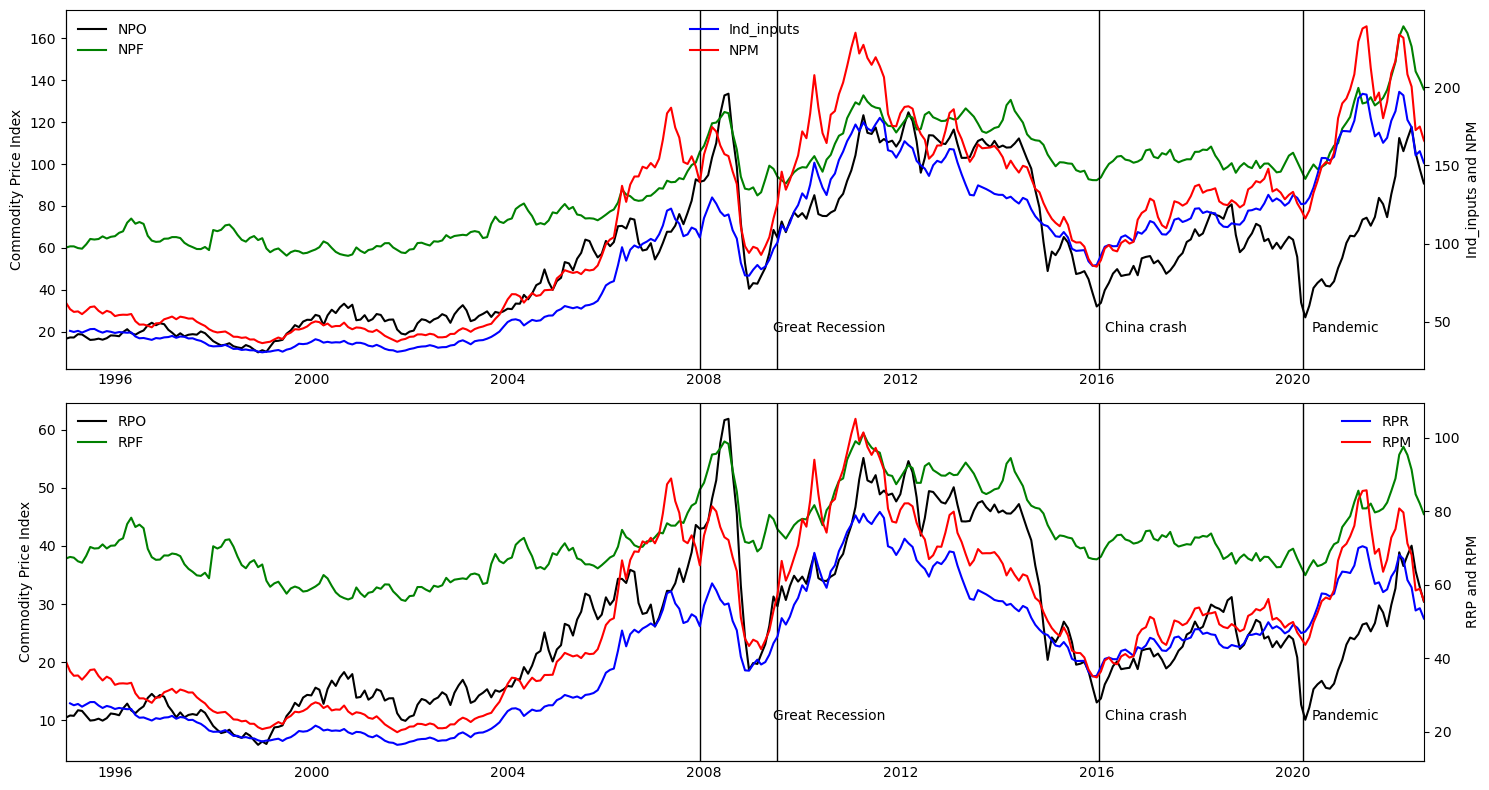

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(2, 1, figsize=(15, 8))

ax1[0].plot(final_data.index, final_data['NPO'], color='black', label='NPO')  #nominal price of oil
ax1[0].plot(final_data.index, final_data['NPF'], color='green', label='NPF') #nominal price of food 


ax1[1].plot(final_data.index, final_data['RPO'], color='black', label='RPO')  #real price of oil
ax1[1].plot(final_data.index, final_data['RPF'], color='green', label='RPF')  #real price of food


ax2 = ax1[0].twinx()  
ax2.plot(final_data.index, final_data['Ind_inputs'], color='blue', label='Ind_inputs') # nominal price of industrial inputs
ax2.plot(final_data.index, final_data['NPM'], color='red', label='NPM') #nominal price of metal (composite)

ax3 = ax1[1].twinx()  
ax3.plot(final_data.index, final_data['RPR'], color='blue', label='RPR') # real price of industrial inputs (raw materials)
ax3.plot(final_data.index, final_data['RPM'], color='red', label='RPM') # real price of metal


for a in range(0, 2):
    ax1[a].set_ylabel('Commodity Price Index')
    ax1[a].legend(frameon=False)
    sns.despine(ax=ax1[a])
    ax1[a].legend(frameon=False)
    ax1[a].tick_params(axis='x', length=0)
    ax1[a].axvline(x=(dt.datetime(2020,3,15)), color='black', linewidth=1)
    ax1[a].axvline(x=(dt.datetime(2009,6,30)), color='black', linewidth=1)
    ax1[a].axvline(x=(dt.datetime(2007,12,1)), color='black', linewidth=1)
    ax1[a].axvline(x=(dt.datetime(2016,1,15)), color='black', linewidth=1)




ax2.set_ylabel('Ind_inputs and NPM')
ax2.legend(frameon=False)

ax3.set_ylabel('RRP and RPM')
ax3.legend(frameon=False)

start_date = pd.to_datetime('1995-01-01')
end_date = pd.to_datetime('2022-09-01')
ax1[0].set_xlim(start_date, end_date)
ax1[1].set_xlim(start_date, end_date)

ax1[1].text(dt.datetime(2020, 5, 15), 10, 'Pandemic')
ax1[0].text(dt.datetime(2020, 5, 15), 20, 'Pandemic')

ax1[0].text(dt.datetime(2016, 3, 1), 20, 'China crash')
ax1[1].text(dt.datetime(2016, 3, 1), 10, 'China crash')

ax1[0].text(dt.datetime(2009, 5, 30), 20, 'Great Recession')
ax1[1].text(dt.datetime(2009, 5, 30), 10, 'Great Recession')
#10/30/2019

plt.tight_layout()
ax2.legend(loc='upper center',frameon=False)

ax1[0].legend(frameon=False)
ax1[1].legend(frameon=False)
plt.savefig("cmotrend.jpg")
#plt.savefig('color.jpg')
plt.show()

In [28]:
#final_data.to_csv('final_data.csv')

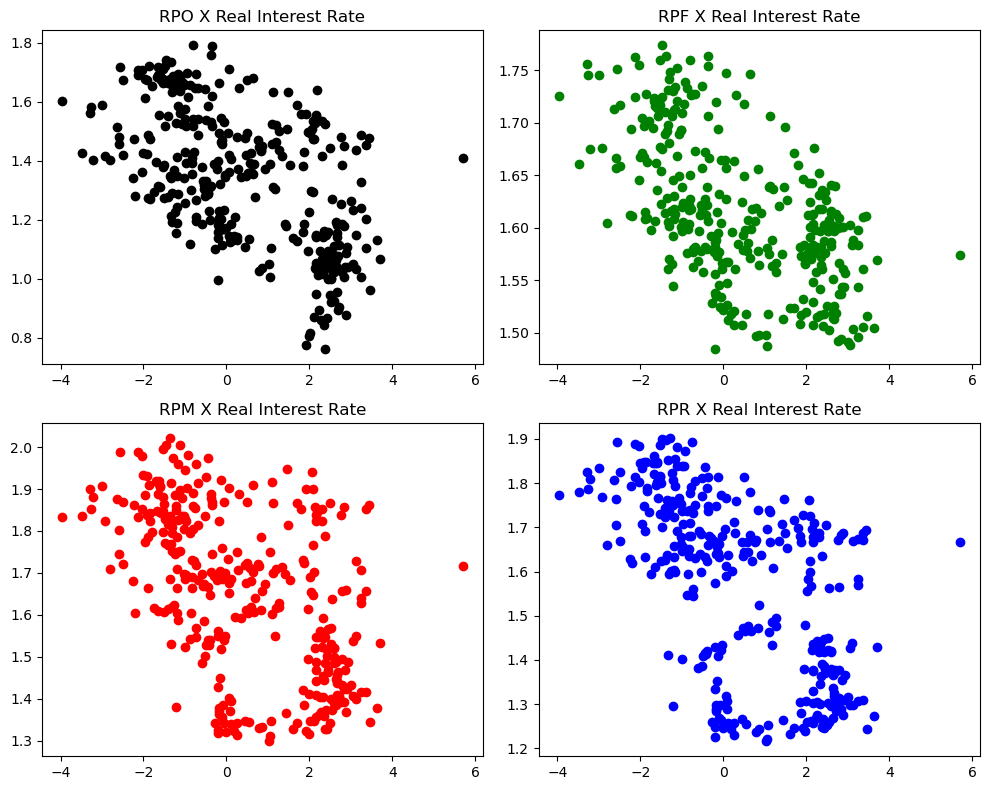

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(10, 8))


ax[0, 0].scatter( final_data['1-Year Interest'],np.log10(final_data['RPO']), color='black')
ax[0, 0].set_title('RPO X Real Interest Rate')


ax[0, 1].scatter( final_data['1-Year Interest'],np.log10(final_data['RPF']), color='green')
ax[0, 1].set_title('RPF X Real Interest Rate')



ax[1, 0].scatter( final_data['1-Year Interest'],np.log10(final_data['RPM']), color='red')
ax[1, 0].set_title('RPM X Real Interest Rate')


ax[1, 1].scatter(final_data['1-Year Interest'],np.log10(final_data['RPR']), color='blue')
ax[1, 1].set_title('RPR X Real Interest Rate')

plt.tight_layout()
plt.savefig('1irscatter.jpg') #save the graph

plt.show()


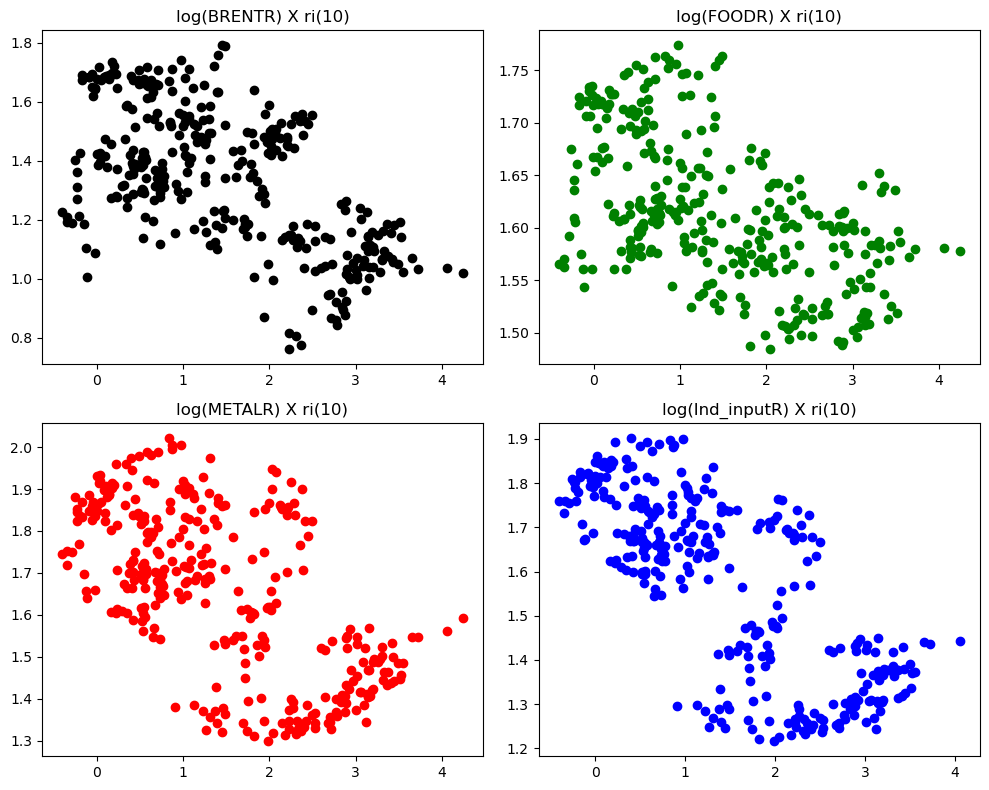

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0, 0].scatter( final_data['10-Year Interest'],np.log10(final_data['RPO']), color='black')
ax[0, 0].set_title('log(BRENTR) X ri(10)')

ax[0, 1].scatter( final_data['10-Year Interest'],np.log10(final_data['RPF']), color='green')
ax[0, 1].set_title('log(FOODR) X ri(10)')


ax[1, 0].scatter( final_data['10-Year Interest'],np.log10(final_data['RPM']), color='red')
ax[1, 0].set_title('log(METALR) X ri(10)')


ax[1, 1].scatter(final_data['10-Year Interest'],np.log10(final_data['RPR']), color='blue')
ax[1, 1].set_title('log(Ind_inputR) X ri(10)')


plt.tight_layout()


plt.show()


# out of curiosity #

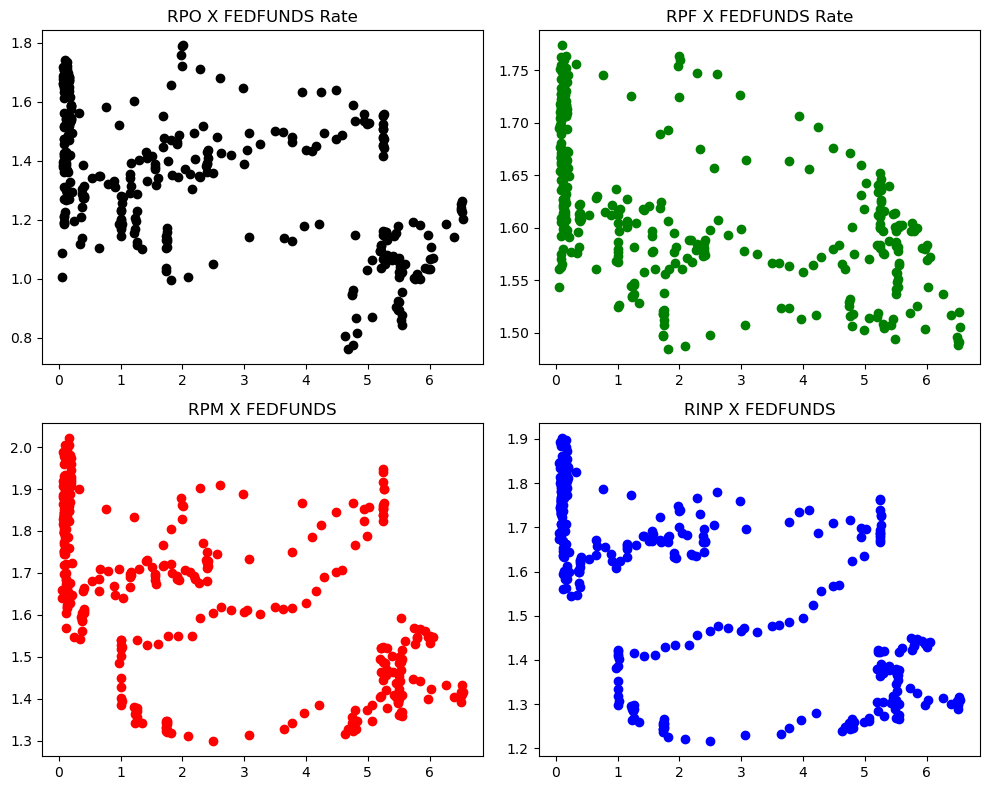

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0, 0].scatter( final_data['FEDFUNDS'],np.log10(final_data['RPO']), color='black')
ax[0, 0].set_title('RPO X FEDFUNDS Rate')

ax[0, 1].scatter( final_data['FEDFUNDS'],np.log10(final_data['RPF']), color='green')
ax[0, 1].set_title('RPF X FEDFUNDS Rate')


ax[1, 0].scatter( final_data['FEDFUNDS'],np.log10(final_data['RPM']), color='red')
ax[1, 0].set_title('RPM X FEDFUNDS')


ax[1, 1].scatter(final_data['FEDFUNDS'],np.log10(final_data['RPR']), color='blue')
ax[1, 1].set_title('RINP X FEDFUNDS')


plt.tight_layout()
plt.savefig('FEDFUNDS.jpg')

plt.show()


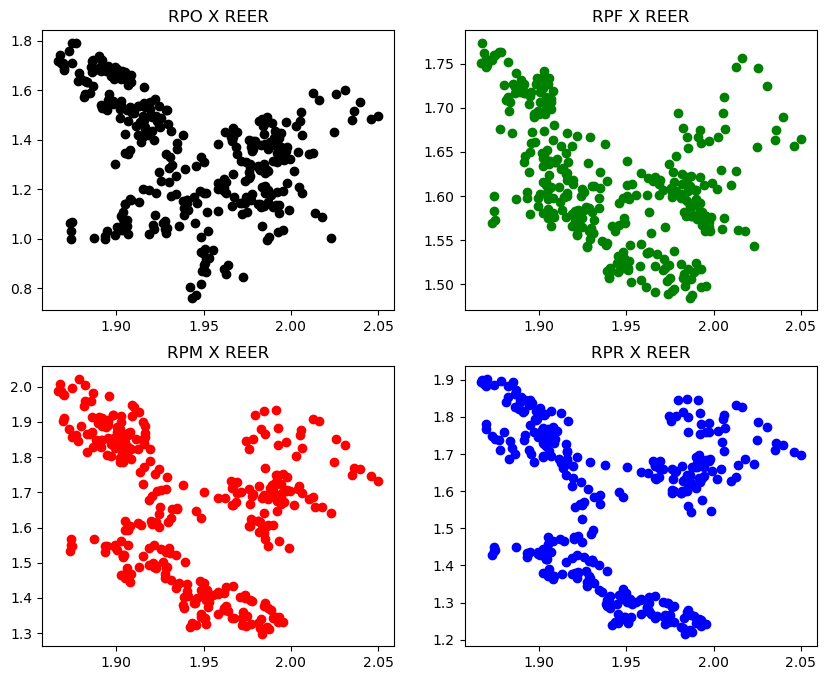

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0, 0].scatter(np.log10(final_data['REER']),np.log10(final_data['RPO']), color='black')
ax[0, 0].set_title('RPO X REER')

ax[0, 1].scatter(np.log10( final_data['REER']),np.log10(final_data['RPF']), color='green')
ax[0, 1].set_title('RPF X REER')


ax[1, 0].scatter(np.log10(final_data['REER']),np.log10(final_data['RPM']), color='red')
ax[1, 0].set_title('RPM X REER')


ax[1, 1].scatter(np.log10(final_data['REER']),np.log10(final_data['RPR']), color='blue')
ax[1, 1].set_title('RPR X REER')

plt.savefig('reerscatter.jpg')
plt.show()


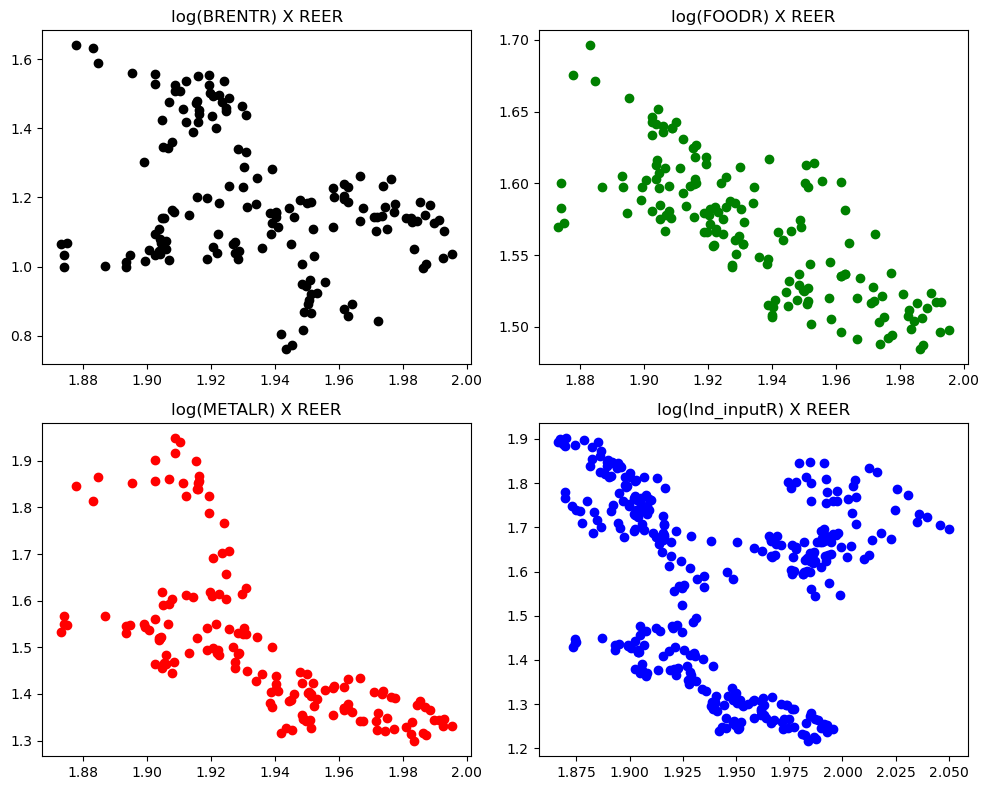

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
final_data1 = final_data.loc['1992-01-01':'2007-12-31']

ax[0, 0].scatter(np.log10(final_data1['REER']),np.log10(final_data1['RPO']), color='black')
ax[0, 0].set_title('log(BRENTR) X REER')

ax[0, 1].scatter(np.log10( final_data1['REER']),np.log10(final_data1['RPF']), color='green')
ax[0, 1].set_title('log(FOODR) X REER')


ax[1, 0].scatter(np.log10(final_data1['REER']),np.log10(final_data1['RPM']), color='red')
ax[1, 0].set_title('log(METALR) X REER')


ax[1, 1].scatter(np.log10(final_data['REER']),np.log10(final_data['RPR']), color='blue')
ax[1, 1].set_title('log(Ind_inputR) X REER')


plt.tight_layout()

plt.show()


In [34]:
final_data.head()

,yo,CPI,REER,NPO,NPF,NPM,1-Year Interest,10-Year Interest,FEDFUNDS,RPO,RPF,RPM,Metals,Precious Metal,Ind_inputs,sum,RPR
DATE,,,,,,,,,,,,,,,,,
1995-01-01,71.638267,159.0,80.69,16.654091,60.153145,62.257141,2.329828,4.244290,5.53,10.474271,37.832167,39.155435,NaN,NaN,NaN,NaN,NaN
1995-02-01,71.517389,159.4,79.90,17.271000,60.736427,58.108061,2.257304,4.054997,5.92,10.835006,38.103153,36.454241,58.108061,30.343371,44.225716,88.451432,27.745117
1995-03-01,71.622271,159.9,78.49,17.236522,60.729126,56.360972,2.161279,3.720986,5.98,10.779563,37.979441,35.247638,56.360972,30.718286,43.539629,87.079258,27.229286
1995-04-01,72.011242,160.4,74.97,18.824000,59.912492,56.665862,2.362220,3.654927,6.05,11.735661,37.351928,35.327844,56.665862,31.813222,44.239542,88.479085,27.580762
1995-05-01,71.986188,160.7,74.69,18.677826,59.624042,54.931480,3.710934,3.420481,6.01,11.622792,37.102702,34.182626,54.931480,31.337340,43.134410,86.268820,26.841574


In [35]:
final_data['OECD_output']=np.log(final_data['yo'])
final_data['Real_oil']=np.log(final_data['RPO'])
final_data['Real_metal']=np.log(final_data['RPM'])
final_data['Real_food']=np.log(final_data['RPF'])
final_data['Real_input']=np.log(final_data['RPR'])
final_data

,yo,CPI,REER,NPO,NPF,NPM,1-Year Interest,10-Year Interest,FEDFUNDS,RPO,...,Metals,Precious Metal,Ind_inputs,sum,RPR,OECD_output,Real_oil,Real_metal,Real_food,Real_input
DATE,,,,,,,,,,,,,,,,,,,,,
1995-01-01,71.638267,159.000,80.69,16.654091,60.153145,62.257141,2.329828,4.244290,5.53,10.474271,...,NaN,NaN,NaN,NaN,NaN,4.271629,2.348922,3.667539,3.633160,NaN
1995-02-01,71.517389,159.400,79.90,17.271000,60.736427,58.108061,2.257304,4.054997,5.92,10.835006,...,58.108061,30.343371,44.225716,88.451432,27.745117,4.269941,2.382782,3.596058,3.640297,3.323060
1995-03-01,71.622271,159.900,78.49,17.236522,60.729126,56.360972,2.161279,3.720986,5.98,10.779563,...,56.360972,30.718286,43.539629,87.079258,27.229286,4.271406,2.377652,3.562399,3.637045,3.304293
1995-04-01,72.011242,160.400,74.97,18.824000,59.912492,56.665862,2.362220,3.654927,6.05,11.735661,...,56.665862,31.813222,44.239542,88.479085,27.580762,4.276822,2.462632,3.564671,3.620385,3.317119
1995-05-01,71.986188,160.700,74.69,18.677826,59.624042,54.931480,3.710934,3.420481,6.01,11.622792,...,54.931480,31.337340,43.134410,86.268820,26.841574,4.276474,2.452968,3.531718,3.613690,3.289952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,107.058502,296.569,108.63,97.643043,140.242179,174.737241,-1.470680,0.855625,2.33,32.924225,...,174.737241,143.263675,159.000458,318.000916,53.613310,4.673375,3.494209,4.076174,3.856261,3.981797
2022-09-01,107.003853,298.284,111.13,90.608182,135.468754,165.864220,-2.589102,1.204249,2.56,30.376481,...,165.864220,137.062373,151.463296,302.926593,50.778217,4.672865,3.413669,4.018294,3.815865,3.927467
2022-10-01,106.191369,299.351,112.19,93.718571,138.284393,161.612637,0.027137,1.797332,3.08,31.307252,...,161.612637,136.059120,148.835879,297.671758,49.719519,4.665243,3.443850,3.988756,3.832866,3.906398


In [36]:
final_data.to_csv('final_data.csv')

In [37]:
MPshocks=pd.read_excel('MPshocksAcosta.xlsx',sheet_name='shocks')
MPshocks

,fomc,ns,target,path,ff.shock.0
0,1995-02-01,1.163436,1.546758,0.264185,0.062222
1,1995-03-28,0.755648,0.719967,0.537239,-0.010000
2,1995-05-23,0.011665,0.102324,-0.065620,0.000000
3,1995-07-06,-4.719216,-2.750982,-3.921459,-0.099200
4,1995-08-22,1.039980,1.295761,0.240067,0.068889
...,...,...,...,...,...
216,2022-03-16,2.333357,-0.671592,3.389443,-0.020667
217,2022-05-04,-0.518762,-0.541011,-0.272046,-0.017222
218,2022-06-15,1.654547,1.030815,1.295952,0.035000
219,2022-07-27,0.126064,-0.393068,0.434245,-0.015000


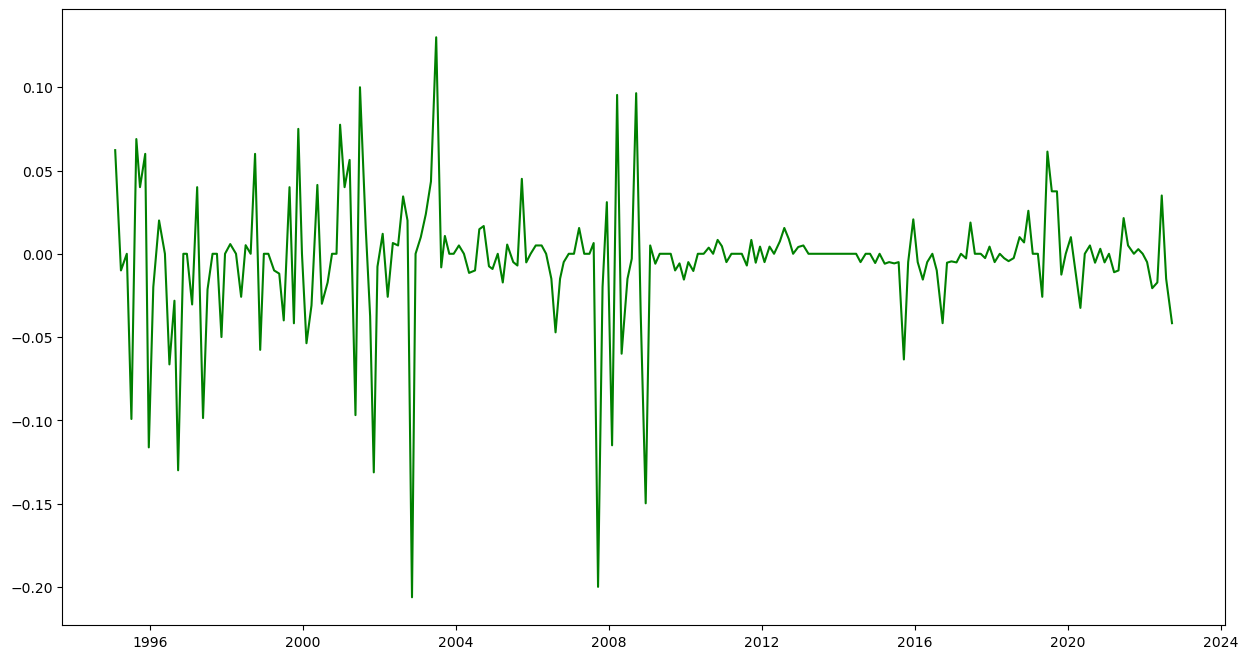

In [38]:

fig, ax = plt.subplots(figsize=(15, 8))

#ax.plot(MPshocks['fomc'],MPshocks['ns'], color='green')
ax.plot(MPshocks['fomc'],MPshocks['ff.shock.0'], color='green')
plt.show()


In [39]:
import pandas as pd


MPshocks['fomc'] = pd.to_datetime(MPshocks['fomc'])

date_range = pd.date_range(start=MPshocks['fomc'].min(), end=MPshocks['fomc'].max(), freq='MS')
complete_dates_df = pd.DataFrame(index=date_range)

merged_df = complete_dates_df.merge(MPshocks, left_index=True, right_on='fomc', how='left')


merged_df.fillna(0, inplace=True)


merged_df.set_index('fomc', inplace=True)

merged_df

,ns,target,path,ff.shock.0
fomc,,,,
1995-02-01,1.163436,1.546758,0.264185,0.062222
1995-03-01,0.000000,0.000000,0.000000,0.000000
1995-04-01,0.000000,0.000000,0.000000,0.000000
1995-05-01,0.000000,0.000000,0.000000,0.000000
1995-06-01,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
2022-05-01,0.000000,0.000000,0.000000,0.000000
2022-06-01,0.000000,0.000000,0.000000,0.000000
2022-07-01,0.000000,0.000000,0.000000,0.000000


In [40]:

MPshocks['fomc'] = pd.to_datetime(MPshocks['fomc'])


MPshocks['fomc'] = MPshocks['fomc'].dt.to_period('M').dt.to_timestamp()


MPshocks


,fomc,ns,target,path,ff.shock.0
0,1995-02-01,1.163436,1.546758,0.264185,0.062222
1,1995-03-01,0.755648,0.719967,0.537239,-0.010000
2,1995-05-01,0.011665,0.102324,-0.065620,0.000000
3,1995-07-01,-4.719216,-2.750982,-3.921459,-0.099200
4,1995-08-01,1.039980,1.295761,0.240067,0.068889
...,...,...,...,...,...
216,2022-03-01,2.333357,-0.671592,3.389443,-0.020667
217,2022-05-01,-0.518762,-0.541011,-0.272046,-0.017222
218,2022-06-01,1.654547,1.030815,1.295952,0.035000
219,2022-07-01,0.126064,-0.393068,0.434245,-0.015000


In [41]:
MPshocks.set_index('fomc',inplace=True)
MPshocks

,ns,target,path,ff.shock.0
fomc,,,,
1995-02-01,1.163436,1.546758,0.264185,0.062222
1995-03-01,0.755648,0.719967,0.537239,-0.010000
1995-05-01,0.011665,0.102324,-0.065620,0.000000
1995-07-01,-4.719216,-2.750982,-3.921459,-0.099200
1995-08-01,1.039980,1.295761,0.240067,0.068889
...,...,...,...,...
2022-03-01,2.333357,-0.671592,3.389443,-0.020667
2022-05-01,-0.518762,-0.541011,-0.272046,-0.017222
2022-06-01,1.654547,1.030815,1.295952,0.035000


In [42]:
FOMC = pd.merge(right=MPshocks, left=merged_df, left_index=True, right_index=True, how='outer', indicator=False)
FOMC

,ns_x,target_x,path_x,ff.shock.0_x,ns_y,target_y,path_y,ff.shock.0_y
fomc,,,,,,,,
1995-02-01,1.163436,1.546758,0.264185,0.062222,1.163436,1.546758,0.264185,0.062222
1995-03-01,0.000000,0.000000,0.000000,0.000000,0.755648,0.719967,0.537239,-0.010000
1995-04-01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1995-05-01,0.000000,0.000000,0.000000,0.000000,0.011665,0.102324,-0.065620,0.000000
1995-06-01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-05-01,0.000000,0.000000,0.000000,0.000000,-0.518762,-0.541011,-0.272046,-0.017222
2022-06-01,0.000000,0.000000,0.000000,0.000000,1.654547,1.030815,1.295952,0.035000
2022-07-01,0.000000,0.000000,0.000000,0.000000,0.126064,-0.393068,0.434245,-0.015000


In [43]:
FOMC=FOMC.drop(columns=['ns_x','target_x','path_x','ff.shock.0_x'])
FOMC                                    

,ns_y,target_y,path_y,ff.shock.0_y
fomc,,,,
1995-02-01,1.163436,1.546758,0.264185,0.062222
1995-03-01,0.755648,0.719967,0.537239,-0.010000
1995-04-01,NaN,NaN,NaN,NaN
1995-05-01,0.011665,0.102324,-0.065620,0.000000
1995-06-01,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-05-01,-0.518762,-0.541011,-0.272046,-0.017222
2022-06-01,1.654547,1.030815,1.295952,0.035000
2022-07-01,0.126064,-0.393068,0.434245,-0.015000


In [44]:
FOMC.reset_index(inplace=True)

In [45]:
FOMC=FOMC.rename(columns={'fomc':'DATE','ns_y':'New_Shock','target_y':'Target','path_y':'Path','ff.shock.0_y':'Fed_Fund_Shock'})
FOMC

,DATE,New_Shock,Target,Path,Fed_Fund_Shock
0,1995-02-01,1.163436,1.546758,0.264185,0.062222
1,1995-03-01,0.755648,0.719967,0.537239,-0.010000
2,1995-04-01,NaN,NaN,NaN,NaN
3,1995-05-01,0.011665,0.102324,-0.065620,0.000000
4,1995-06-01,NaN,NaN,NaN,NaN
...,...,...,...,...,...
327,2022-05-01,-0.518762,-0.541011,-0.272046,-0.017222
328,2022-06-01,1.654547,1.030815,1.295952,0.035000
329,2022-07-01,0.126064,-0.393068,0.434245,-0.015000
330,2022-08-01,NaN,NaN,NaN,NaN


In [46]:
FOMC.replace(np.nan, 0, inplace=True)
FOMC

,DATE,New_Shock,Target,Path,Fed_Fund_Shock
0,1995-02-01,1.163436,1.546758,0.264185,0.062222
1,1995-03-01,0.755648,0.719967,0.537239,-0.010000
2,1995-04-01,0.000000,0.000000,0.000000,0.000000
3,1995-05-01,0.011665,0.102324,-0.065620,0.000000
4,1995-06-01,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
327,2022-05-01,-0.518762,-0.541011,-0.272046,-0.017222
328,2022-06-01,1.654547,1.030815,1.295952,0.035000
329,2022-07-01,0.126064,-0.393068,0.434245,-0.015000
330,2022-08-01,0.000000,0.000000,0.000000,0.000000


In [47]:
FOMC.set_index('DATE',inplace=True)

In [48]:
Final_data1 = pd.merge(right=final_data, left=FOMC, left_index=True, right_index=True, how='outer', indicator=False)

In [49]:
Final_data1

,New_Shock,Target,Path,Fed_Fund_Shock,yo,CPI,REER,NPO,NPF,NPM,...,Metals,Precious Metal,Ind_inputs,sum,RPR,OECD_output,Real_oil,Real_metal,Real_food,Real_input
DATE,,,,,,,,,,,,,,,,,,,,,
1995-01-01,NaN,NaN,NaN,NaN,71.638267,159.000,80.69,16.654091,60.153145,62.257141,...,NaN,NaN,NaN,NaN,NaN,4.271629,2.348922,3.667539,3.633160,NaN
1995-02-01,1.163436,1.546758,0.264185,0.062222,71.517389,159.400,79.90,17.271000,60.736427,58.108061,...,58.108061,30.343371,44.225716,88.451432,27.745117,4.269941,2.382782,3.596058,3.640297,3.323060
1995-03-01,0.755648,0.719967,0.537239,-0.010000,71.622271,159.900,78.49,17.236522,60.729126,56.360972,...,56.360972,30.718286,43.539629,87.079258,27.229286,4.271406,2.377652,3.562399,3.637045,3.304293
1995-04-01,0.000000,0.000000,0.000000,0.000000,72.011242,160.400,74.97,18.824000,59.912492,56.665862,...,56.665862,31.813222,44.239542,88.479085,27.580762,4.276822,2.462632,3.564671,3.620385,3.317119
1995-05-01,0.011665,0.102324,-0.065620,0.000000,71.986188,160.700,74.69,18.677826,59.624042,54.931480,...,54.931480,31.337340,43.134410,86.268820,26.841574,4.276474,2.452968,3.531718,3.613690,3.289952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,0.000000,0.000000,0.000000,0.000000,107.058502,296.569,108.63,97.643043,140.242179,174.737241,...,174.737241,143.263675,159.000458,318.000916,53.613310,4.673375,3.494209,4.076174,3.856261,3.981797
2022-09-01,1.994550,-0.957077,3.240100,-0.041667,107.003853,298.284,111.13,90.608182,135.468754,165.864220,...,165.864220,137.062373,151.463296,302.926593,50.778217,4.672865,3.413669,4.018294,3.815865,3.927467
2022-10-01,NaN,NaN,NaN,NaN,106.191369,299.351,112.19,93.718571,138.284393,161.612637,...,161.612637,136.059120,148.835879,297.671758,49.719519,4.665243,3.443850,3.988756,3.832866,3.906398


In [50]:
Final_data1.dropna(inplace=True)

In [51]:
Final_data1.isnull().sum()

New_Shock           0
Target              0
Path                0
Fed_Fund_Shock      0
yo                  0
CPI                 0
REER                0
NPO                 0
NPF                 0
NPM                 0
1-Year Interest     0
10-Year Interest    0
FEDFUNDS            0
RPO                 0
RPF                 0
RPM                 0
Metals              0
Precious Metal      0
Ind_inputs          0
sum                 0
RPR                 0
OECD_output         0
Real_oil            0
Real_metal          0
Real_food           0
Real_input          0
dtype: int64

In [52]:
Final_data1

,New_Shock,Target,Path,Fed_Fund_Shock,yo,CPI,REER,NPO,NPF,NPM,...,Metals,Precious Metal,Ind_inputs,sum,RPR,OECD_output,Real_oil,Real_metal,Real_food,Real_input
DATE,,,,,,,,,,,,,,,,,,,,,
1995-02-01,1.163436,1.546758,0.264185,0.062222,71.517389,159.400,79.90,17.271000,60.736427,58.108061,...,58.108061,30.343371,44.225716,88.451432,27.745117,4.269941,2.382782,3.596058,3.640297,3.323060
1995-03-01,0.755648,0.719967,0.537239,-0.010000,71.622271,159.900,78.49,17.236522,60.729126,56.360972,...,56.360972,30.718286,43.539629,87.079258,27.229286,4.271406,2.377652,3.562399,3.637045,3.304293
1995-04-01,0.000000,0.000000,0.000000,0.000000,72.011242,160.400,74.97,18.824000,59.912492,56.665862,...,56.665862,31.813222,44.239542,88.479085,27.580762,4.276822,2.462632,3.564671,3.620385,3.317119
1995-05-01,0.011665,0.102324,-0.065620,0.000000,71.986188,160.700,74.69,18.677826,59.624042,54.931480,...,54.931480,31.337340,43.134410,86.268820,26.841574,4.276474,2.452968,3.531718,3.613690,3.289952
1995-06-01,0.000000,0.000000,0.000000,0.000000,72.037509,161.100,74.85,17.353182,61.689343,57.080115,...,57.080115,31.433258,44.256686,88.513373,27.471562,4.277187,2.376921,3.567601,3.645256,3.313151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,-0.518762,-0.541011,-0.272046,-0.017222,105.969430,292.072,106.08,112.113636,162.525242,208.086171,...,208.086171,149.927321,179.006746,358.013492,61.288568,4.663151,3.647683,4.266122,4.019003,4.115593
2022-06-01,1.654547,1.030815,1.295952,0.035000,106.762832,293.972,107.35,117.692727,156.114199,200.262240,...,200.262240,148.240501,174.251370,348.502741,59.274819,4.670610,3.689763,4.221313,3.972273,4.082185
2022-07-01,0.126064,-0.393068,0.434245,-0.015000,106.394737,295.055,109.58,105.252857,144.223754,172.466826,...,172.466826,140.334613,156.400720,312.801440,53.007310,4.667156,3.574374,4.068213,3.889374,3.970430


In [53]:
Final_data1.to_csv('Final_data1.csv')

In [54]:
Final_R=Final_data1.loc['1996-01-01':'2021-12-01']
Final_R.to_csv('Final_R.csv')
Final_R
                   

,New_Shock,Target,Path,Fed_Fund_Shock,yo,CPI,REER,NPO,NPF,NPM,...,Metals,Precious Metal,Ind_inputs,sum,RPR,OECD_output,Real_oil,Real_metal,Real_food,Real_input
DATE,,,,,,,,,,,,,,,,,,,,,
1996-01-01,-0.630707,-0.371259,-0.496907,-0.020000,73.034247,163.700,80.12,18.135217,65.598639,53.667571,...,53.667571,32.149207,42.908389,85.816779,26.211600,4.290928,2.404990,3.489944,3.690690,3.266202
1996-02-01,0.000000,0.000000,0.000000,0.000000,73.243314,164.000,80.16,17.846190,67.190639,54.351161,...,54.351161,32.576023,43.463592,86.927184,26.502190,4.293787,2.387094,3.500770,3.712838,3.277227
1996-03-01,0.617441,0.185916,0.562712,0.020000,73.215504,164.400,80.19,19.809524,67.911077,54.566432,...,54.566432,31.922851,43.244642,86.489283,26.304527,4.293407,2.489031,3.502287,3.721067,3.269741
1996-04-01,0.000000,0.000000,0.000000,0.000000,73.515803,164.600,80.12,21.200455,72.038577,54.475964,...,54.475964,31.624851,43.050407,86.100814,26.154561,4.297500,2.555675,3.499411,3.778854,3.264024
1996-05-01,0.570111,0.171120,0.598471,0.000000,73.993791,165.000,80.22,19.319130,74.005750,55.009486,...,55.009486,31.495146,43.252316,86.504632,26.213525,4.303981,2.460321,3.506730,3.803368,3.266275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,0.000000,0.000000,0.000000,0.000000,103.710190,278.993,98.28,70.588182,131.894620,212.235541,...,212.235541,148.158526,180.197033,360.394066,64.588371,4.641600,3.230846,4.331680,3.855987,4.168034
2021-09-01,0.187365,0.143278,0.128873,0.000000,102.553668,279.710,98.30,74.749545,127.983212,191.430068,...,191.430068,145.543701,168.486885,336.973770,60.236275,4.630386,3.285560,4.225939,3.823316,4.098275
2021-10-01,0.000000,0.000000,0.000000,0.000000,104.052570,281.623,99.41,83.865238,129.492891,196.475390,...,196.475390,145.241816,170.858603,341.717206,60.669265,4.644896,3.393812,4.245138,3.828227,4.105437
